# Lecture 05
2019-05-21

Course material is available at http://unihb.eu/pdap2019

## Questions about reading assignment
 
* none ...

## Transcript

1. Discussion of previous homework exercises (see `homework` directory)
2. Selecting data using boolean indexes
3. File encodings
4. Datetime columns in pandas
5. Data aggregation
6. String formatting
7. String columns in pandas

### Selecting data

In [1]:
complaints = pd.read_csv('../data/311-service-requests.csv')
complaints.head()

/home/jupyterhub/conda/envs/prod/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Unique Key            Created Date             Closed Date Agency  \
0    26589651  10/31/2013 02:08:41 AM                     NaN   NYPD   
1    26593698  10/31/2013 02:01:04 AM                     NaN   NYPD   
2    26594139  10/31/2013 02:00:24 AM  10/31/2013 02:40:32 AM   NYPD   
3    26595721  10/31/2013 01:56:23 AM  10/31/2013 02:21:48 AM   NYPD   
4    26590930  10/31/2013 01:53:44 AM                     NaN  DOHMH   

                               Agency Name           Complaint Type  \
0          New York City Police Department  Noise - Street/Sidewalk   
1          New York City Police Department          Illegal Parking   
2          New York City Police Department       Noise - Commercial   
3          New York City Police Department          Noise - Vehicle   
4  Department of Health and Mental Hygiene                   Rodent   

                     Descriptor        Location Type Incident Zip  \
0                  Loud Talking      Street/Sidewalk        11432   
1  Commercial Overnight Parking      Street/Sidewalk        11378   
2              Loud Music/Party  Club/Bar/Restaurant        10032   
3                Car/Truck Horn      Street/Sidewalk        10023   
4  Condition Attracting Rodents           Vacant Lot        10027   

   Incident Address  ... Bridge Highway Name Bridge Highway Direction  \
0  90-03 169 STREET  ...                 NaN                      NaN   
1         58 AVENUE  ...                 NaN                      NaN   
2     4060 BROADWAY  ...                 NaN                      NaN   
3    WEST 72 STREET  ...                 NaN                      NaN   
4   WEST 124 STREET  ...                 NaN                      NaN   

  Road Ramp Bridge Highway Segment Garage Lot Name Ferry Direction  \
0       NaN                    NaN             NaN             NaN   
1       NaN                    NaN             NaN             NaN   
2       NaN                    NaN             NaN             NaN   
3       NaN                    NaN             NaN             NaN   
4       NaN                    NaN             NaN             NaN   

  Ferry Terminal Name   Latitude  Longitude  \
0                 NaN  40.708275 -73.791604   
1                 NaN  40.721041 -73.909453   
2                 NaN  40.843330 -73.939144   
3                 NaN  40.778009 -73.980213   
4                 NaN  40.807691 -73.947387   

                                   Location  
0   (40.70827532593202, -73.79160395779721)  
1  (40.721040535628305, -73.90945306791765)  
2   (40.84332975466513, -73.93914371913482)  
3    (40.7780087446372, -73.98021349023975)  
4   (40.80769092704951, -73.94738703491433)  

[5 rows x 52 columns]

In [2]:
is_noise = (complaints['Complaint Type'] == 'Noise - Street/Sidewalk')
noise_complaints = complaints[is_noise]
noise_complaints.head()

Unique Key            Created Date             Closed Date Agency  \
0     26589651  10/31/2013 02:08:41 AM                     NaN   NYPD   
16    26594086  10/31/2013 12:54:03 AM  10/31/2013 02:16:39 AM   NYPD   
25    26591573  10/31/2013 12:35:18 AM  10/31/2013 02:41:35 AM   NYPD   
28    26594085  10/31/2013 12:32:08 AM                     NaN   NYPD   
31    26595564  10/31/2013 12:30:36 AM                     NaN   NYPD   

                        Agency Name           Complaint Type  \
0   New York City Police Department  Noise - Street/Sidewalk   
16  New York City Police Department  Noise - Street/Sidewalk   
25  New York City Police Department  Noise - Street/Sidewalk   
28  New York City Police Department  Noise - Street/Sidewalk   
31  New York City Police Department  Noise - Street/Sidewalk   

          Descriptor    Location Type Incident Zip     Incident Address  ...  \
0       Loud Talking  Street/Sidewalk        11432     90-03 169 STREET  ...   
16  Loud Music/Party  Street/Sidewalk        10310  173 CAMPBELL AVENUE  ...   
25      Loud Talking  Street/Sidewalk        10312    24 PRINCETON LANE  ...   
28      Loud Talking  Street/Sidewalk        10026  121 WEST 116 STREET  ...   
31  Loud Music/Party  Street/Sidewalk        11236             AVENUE J  ...   

   Bridge Highway Name Bridge Highway Direction Road Ramp  \
0                  NaN                      NaN       NaN   
16                 NaN                      NaN       NaN   
25                 NaN                      NaN       NaN   
28                 NaN                      NaN       NaN   
31                 NaN                      NaN       NaN   

   Bridge Highway Segment Garage Lot Name Ferry Direction Ferry Terminal Name  \
0                     NaN             NaN             NaN                 NaN   
16                    NaN             NaN             NaN                 NaN   
25                    NaN             NaN             NaN                 NaN   
28                    NaN             NaN             NaN                 NaN   
31                    NaN             NaN             NaN                 NaN   

     Latitude  Longitude                                  Location  
0   40.708275 -73.791604   (40.70827532593202, -73.79160395779721)  
16  40.636182 -74.116150    (40.63618202176914, -74.1161500428337)  
25  40.553421 -74.196743   (40.55342078716953, -74.19674315017886)  
28  40.802390 -73.950526   (40.80238950799943, -73.95052644123253)  
31  40.634104 -73.911055  (40.634103775951736, -73.91105541883589)  

[5 rows x 52 columns]

In [3]:
(noise_complaints['Complaint Type'] == 'Noise - Street/Sidewalk').all()

True

In [4]:
complaints.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Termina

In [5]:
complaints['Borough'].unique()

array(['QUEENS', 'MANHATTAN', 'BROOKLYN', 'BRONX', 'STATEN ISLAND',
       'Unspecified'], dtype=object)

In [6]:
pd.unique(complaints['Borough'])

array(['QUEENS', 'MANHATTAN', 'BROOKLYN', 'BRONX', 'STATEN ISLAND',
       'Unspecified'], dtype=object)

In [7]:
is_brooklyn = (complaints['Borough'] == 'BROOKLYN')
is_brooklyn.head()

0    False
1    False
2    False
3    False
4    False
Name: Borough, dtype: bool

In [8]:
complaints[is_noise & is_brooklyn].head()

Unique Key            Created Date             Closed Date Agency  \
31     26595564  10/31/2013 12:30:36 AM                     NaN   NYPD   
49     26595553  10/31/2013 12:05:10 AM  10/31/2013 02:43:43 AM   NYPD   
109    26594653  10/30/2013 11:26:32 PM  10/31/2013 12:18:54 AM   NYPD   
236    26591992  10/30/2013 10:02:58 PM  10/30/2013 10:23:20 PM   NYPD   
370    26594167  10/30/2013 08:38:25 PM  10/30/2013 10:26:28 PM   NYPD   

                         Agency Name           Complaint Type  \
31   New York City Police Department  Noise - Street/Sidewalk   
49   New York City Police Department  Noise - Street/Sidewalk   
109  New York City Police Department  Noise - Street/Sidewalk   
236  New York City Police Department  Noise - Street/Sidewalk   
370  New York City Police Department  Noise - Street/Sidewalk   

           Descriptor    Location Type Incident Zip    Incident Address  ...  \
31   Loud Music/Party  Street/Sidewalk        11236            AVENUE J  ...   
49       Loud Talking  Street/Sidewalk        11225  25 LEFFERTS AVENUE  ...   
109  Loud Music/Party  Street/Sidewalk        11222                 NaN  ...   
236      Loud Talking  Street/Sidewalk        11218       DITMAS AVENUE  ...   
370  Loud Music/Party  Street/Sidewalk        11218    126 BEVERLY ROAD  ...   

    Bridge Highway Name Bridge Highway Direction Road Ramp  \
31                  NaN                      NaN       NaN   
49                  NaN                      NaN       NaN   
109                 NaN                      NaN       NaN   
236                 NaN                      NaN       NaN   
370                 NaN                      NaN       NaN   

    Bridge Highway Segment Garage Lot Name Ferry Direction  \
31                     NaN             NaN             NaN   
49                     NaN             NaN             NaN   
109                    NaN             NaN             NaN   
236                    NaN             NaN             NaN   
370                    NaN             NaN             NaN   

    Ferry Terminal Name   Latitude  Longitude  \
31                  NaN  40.634104 -73.911055   
49                  NaN  40.661793 -73.959934   
109                 NaN  40.724600 -73.954271   
236                 NaN  40.636169 -73.972455   
370                 NaN  40.642922 -73.978762   

                                     Location  
31   (40.634103775951736, -73.91105541883589)  
49     (40.6617931276793, -73.95993363978067)  
109  (40.724599563793525, -73.95427134534344)  
236   (40.63616876563881, -73.97245504682485)  
370    (40.6429222774404, -73.97876175474585)  

[5 rows x 52 columns]

In [9]:
noise_complaint_counts = noise_complaints['Borough'].value_counts()
noise_complaint_counts

MANHATTAN        917
BROOKLYN         456
BRONX            292
QUEENS           226
STATEN ISLAND     36
Unspecified        1
Name: Borough, dtype: int64

In [10]:
complaint_counts = complaints['Borough'].value_counts()
complaint_counts

BROOKLYN         32890
MANHATTAN        24288
QUEENS           22281
BRONX            19686
Unspecified       7107
STATEN ISLAND     4817
Name: Borough, dtype: int64

In [11]:
noise_complaint_counts / complaint_counts

BRONX            0.014833
BROOKLYN         0.013864
MANHATTAN        0.037755
QUEENS           0.010143
STATEN ISLAND    0.007474
Unspecified      0.000141
Name: Borough, dtype: float64

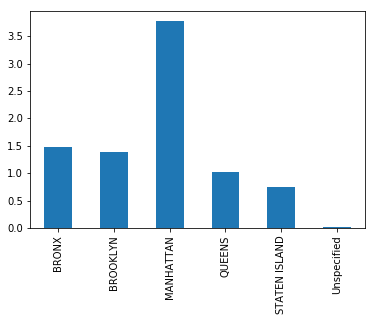

In [12]:
%matplotlib inline
(100. * noise_complaint_counts / complaint_counts).plot.bar()

In [13]:
test = noise_complaint_counts.copy()
test['other'] = 123
test

MANHATTAN        917
BROOKLYN         456
BRONX            292
QUEENS           226
STATEN ISLAND     36
Unspecified        1
other            123
Name: Borough, dtype: int64

In [14]:
test / complaint_counts

BRONX            0.014833
BROOKLYN         0.013864
MANHATTAN        0.037755
QUEENS           0.010143
STATEN ISLAND    0.007474
Unspecified      0.000141
other                 NaN
Name: Borough, dtype: float64

### Reading ASCII data: file encodings

In [15]:
pd.read_csv('../data/bikes.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 15: invalid continuation byte

Potential candidates for the `encoding` kwargs:
- `latin1`
- `cp1252`
- ...

In [16]:
df = pd.read_csv('../data/bikes.csv', encoding='latin1', delimiter=';', parse_dates=['Date'], dayfirst=True, index_col='Date')
df.head()

Berri 1  Brébeuf (données non disponibles)  Côte-Sainte-Catherine  \
Date                                                                            
2012-01-01       35                                NaN                      0   
2012-01-02       83                                NaN                      1   
2012-01-03      135                                NaN                      2   
2012-01-04      144                                NaN                      1   
2012-01-05      197                                NaN                      2   

            Maisonneuve 1  Maisonneuve 2  du Parc  Pierre-Dupuy  Rachel1  \
Date                                                                       
2012-01-01             38             51       26            10       16   
2012-01-02             68            153       53             6       43   
2012-01-03            104            248       89             3       58   
2012-01-04            116            318      111             8       61   
2012-01-05            124            330       97            13       95   

            St-Urbain (données non disponibles)  
Date                                             
2012-01-01                                  NaN  
2012-01-02                                  NaN  
2012-01-03                                  NaN  
2012-01-04                                  NaN  
2012-01-05                                  NaN

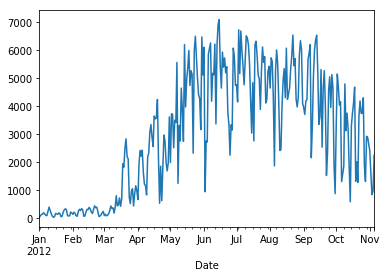

In [17]:
df['Berri 1'].plot()

### Using time information from datetime columns

In [18]:
df.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30',
               '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03',
               '2012-11-04', '2012-11-05'],
              dtype='datetime64[ns]', name='Date', length=310, freq=None)

In [19]:
df.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0],
           dtype='int64', name='Date', length=310)

In [20]:
df.index.weekday_name

Index(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday', 'Monday', 'Tuesday',
       ...
       'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday', 'Sunday', 'Monday'],
      dtype='object', name='Date', length=310)

In [21]:
# add a new column with the weekday name to the dataframe
df.loc[:, 'Weekday'] = df.index.weekday_name
df.head()

Berri 1  Brébeuf (données non disponibles)  Côte-Sainte-Catherine  \
Date                                                                            
2012-01-01       35                                NaN                      0   
2012-01-02       83                                NaN                      1   
2012-01-03      135                                NaN                      2   
2012-01-04      144                                NaN                      1   
2012-01-05      197                                NaN                      2   

            Maisonneuve 1  Maisonneuve 2  du Parc  Pierre-Dupuy  Rachel1  \
Date                                                                       
2012-01-01             38             51       26            10       16   
2012-01-02             68            153       53             6       43   
2012-01-03            104            248       89             3       58   
2012-01-04            116            318      111             8       61   
2012-01-05            124            330       97            13       95   

            St-Urbain (données non disponibles)    Weekday  
Date                                                        
2012-01-01                                  NaN     Sunday  
2012-01-02                                  NaN     Monday  
2012-01-03                                  NaN    Tuesday  
2012-01-04                                  NaN  Wednesday  
2012-01-05                                  NaN   Thursday

In [22]:
import numpy as np

In [23]:
df.Weekday.unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

### Aggregation of data

In [24]:
df.groupby('Weekday').aggregate(np.sum)

Berri 1  Brébeuf (données non disponibles)  Côte-Sainte-Catherine  \
Weekday                                                                        
Friday      141771                                0.0                  56446   
Monday      134298                                0.0                  60329   
Saturday    101578                                0.0                  34018   
Sunday       99310                                0.0                  36466   
Thursday    160131                                0.0                  69028   
Tuesday     135305                                0.0                  58708   
Wednesday   152972                                0.0                  67344   

           Maisonneuve 1  Maisonneuve 2  du Parc  Pierre-Dupuy  Rachel1  \
Weekday                                                                   
Friday             98568         172390    89872         42470   137255   
Monday             90051         163767    90184         46204   130130   
Saturday           62067         105060    48289         52861   112828   
Sunday             55324          98308    50004         61485   117150   
Thursday          111895         196715   105674         45385   140241   
Tuesday            92035         165880    91399         35167   120088   
Wednesday         104891         186061   102103         43263   133088   

           St-Urbain (données non disponibles)  
Weekday                                         
Friday                                     0.0  
Monday                                     0.0  
Saturday                                   0.0  
Sunday                                     0.0  
Thursday                                   0.0  
Tuesday                                    0.0  
Wednesday                                  0.0

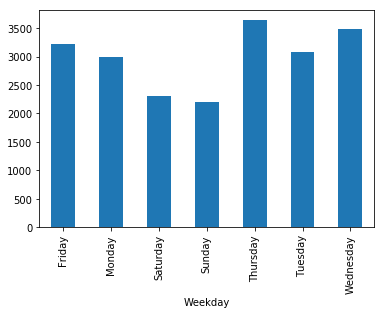

In [25]:
df.groupby('Weekday').aggregate(np.mean)['Berri 1'].plot.bar()

### String formatting

In [26]:
'we can ' + ' 234 ' + 'bka'

'we can  234 bka'

In [27]:
mystring = '{name} is {age} years old'
mystring.format(name='Andreas', age=41)

'Andreas is 41 years old'

In [28]:
url_template = "http://climate.weather.gc.ca/climate_data/bulk_data_e.html?stationID=5415&Year={year}&Month={month}&format=csv&timeframe=1&submit=%20Download+Data"
url_template.format(year=2012, month=3)

'http://climate.weather.gc.ca/climate_data/bulk_data_e.html?stationID=5415&Year=2012&Month=3&format=csv&timeframe=1&submit=%20Download+Data'

In [29]:
# pandas can read csv data from the internet
weather_mar2012 = pd.read_csv(url_template.format(year=2012, month=3), skiprows=15, index_col='Date/Time', parse_dates=True,)
weather_mar2012.head()

Year  Month  Day   Time  Temp (°C)  Temp Flag  \
Date/Time                                                            
2012-03-01 00:00:00  2012      3    1  00:00       -5.5        NaN   
2012-03-01 01:00:00  2012      3    1  01:00       -5.7        NaN   
2012-03-01 02:00:00  2012      3    1  02:00       -5.4        NaN   
2012-03-01 03:00:00  2012      3    1  03:00       -4.7        NaN   
2012-03-01 04:00:00  2012      3    1  04:00       -5.4        NaN   

                     Dew Point Temp (°C)  Dew Point Temp Flag  Rel Hum (%)  \
Date/Time                                                                    
2012-03-01 00:00:00                 -9.7                  NaN           72   
2012-03-01 01:00:00                 -8.7                  NaN           79   
2012-03-01 02:00:00                 -8.3                  NaN           80   
2012-03-01 03:00:00                 -7.7                  NaN           79   
2012-03-01 04:00:00                 -7.8                  NaN           83   

                     Rel Hum Flag  ...  Wind Spd Flag  Visibility (km)  \
Date/Time                          ...                                   
2012-03-01 00:00:00           NaN  ...            NaN              4.0   
2012-03-01 01:00:00           NaN  ...            NaN              2.4   
2012-03-01 02:00:00           NaN  ...            NaN              4.8   
2012-03-01 03:00:00           NaN  ...            NaN              4.0   
2012-03-01 04:00:00           NaN  ...            NaN              1.6   

                     Visibility Flag Stn Press (kPa)  Stn Press Flag  Hmdx  \
Date/Time                                                                    
2012-03-01 00:00:00              NaN          100.97             NaN   NaN   
2012-03-01 01:00:00              NaN          100.87             NaN   NaN   
2012-03-01 02:00:00              NaN          100.80             NaN   NaN   
2012-03-01 03:00:00              NaN          100.69             NaN   NaN   
2012-03-01 04:00:00              NaN          100.62             NaN   NaN   

                     Hmdx Flag  Wind Chill  Wind Chill Flag  Weather  
Date/Time                                                             
2012-03-01 00:00:00        NaN       -13.0              NaN     Snow  
2012-03-01 01:00:00        NaN       -13.0              NaN     Snow  
2012-03-01 02:00:00        NaN       -13.0              NaN     Snow  
2012-03-01 03:00:00        NaN       -12.0              NaN     Snow  
2012-03-01 04:00:00        NaN       -14.0              NaN     Snow  

[5 rows x 23 columns]

In [30]:
weather_mar2012['Weather']

Date/Time
2012-03-01 00:00:00             Snow
2012-03-01 01:00:00             Snow
2012-03-01 02:00:00             Snow
2012-03-01 03:00:00             Snow
2012-03-01 04:00:00             Snow
2012-03-01 05:00:00             Snow
2012-03-01 06:00:00             Snow
2012-03-01 07:00:00             Snow
2012-03-01 08:00:00             Snow
2012-03-01 09:00:00             Snow
2012-03-01 10:00:00             Snow
2012-03-01 11:00:00             Snow
2012-03-01 12:00:00             Snow
2012-03-01 13:00:00             Snow
2012-03-01 14:00:00             Snow
2012-03-01 15:00:00             Snow
2012-03-01 16:00:00             Snow
2012-03-01 17:00:00             Snow
2012-03-01 18:00:00             Snow
2012-03-01 19:00:00             Snow
2012-03-01 20:00:00             Snow
2012-03-01 21:00:00             Snow
2012-03-01 22:00:00             Snow
2012-03-01 23:00:00             Snow
2012-03-02 00:00:00             Snow
2012-03-02 01:00:00             Snow
2012-03-02 02:00:00         

In [31]:
weather_mar2012['Weather'].unique()

array(['Snow', 'Cloudy', 'Freezing Drizzle,Snow', 'Fog',
       'Snow,Ice Pellets', 'Mainly Clear', 'Mostly Cloudy',
       'Rain Showers', 'Snow Showers', 'Clear', 'Rain', 'Rain,Fog',
       'Rain,Haze', 'Drizzle,Fog', 'Haze', 'Snow,Fog', 'Freezing Fog',
       'Drizzle'], dtype=object)

In [32]:
weather_mar2012.index.hour

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
            14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='Date/Time', length=744)

### Working with string columns in pandas

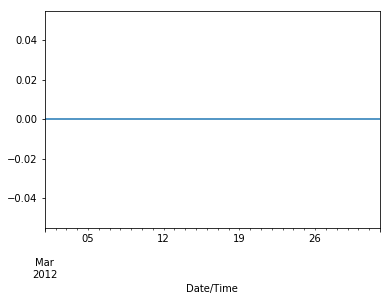

In [33]:
weather_mar2012['Weather'].str.contains('snow').astype('float').plot()

In [34]:
is_uppercase_snow = weather_mar2012['Weather'].str.contains('Snow')
is_lowercase_snow = weather_mar2012['Weather'].str.contains('snow')
weather_mar2012[is_uppercase_snow | is_lowercase_snow].head()

Year  Month  Day   Time  Temp (°C)  Temp Flag  \
Date/Time                                                            
2012-03-01 00:00:00  2012      3    1  00:00       -5.5        NaN   
2012-03-01 01:00:00  2012      3    1  01:00       -5.7        NaN   
2012-03-01 02:00:00  2012      3    1  02:00       -5.4        NaN   
2012-03-01 03:00:00  2012      3    1  03:00       -4.7        NaN   
2012-03-01 04:00:00  2012      3    1  04:00       -5.4        NaN   

                     Dew Point Temp (°C)  Dew Point Temp Flag  Rel Hum (%)  \
Date/Time                                                                    
2012-03-01 00:00:00                 -9.7                  NaN           72   
2012-03-01 01:00:00                 -8.7                  NaN           79   
2012-03-01 02:00:00                 -8.3                  NaN           80   
2012-03-01 03:00:00                 -7.7                  NaN           79   
2012-03-01 04:00:00                 -7.8                  NaN           83   

                     Rel Hum Flag  ...  Wind Spd Flag  Visibility (km)  \
Date/Time                          ...                                   
2012-03-01 00:00:00           NaN  ...            NaN              4.0   
2012-03-01 01:00:00           NaN  ...            NaN              2.4   
2012-03-01 02:00:00           NaN  ...            NaN              4.8   
2012-03-01 03:00:00           NaN  ...            NaN              4.0   
2012-03-01 04:00:00           NaN  ...            NaN              1.6   

                     Visibility Flag Stn Press (kPa)  Stn Press Flag  Hmdx  \
Date/Time                                                                    
2012-03-01 00:00:00              NaN          100.97             NaN   NaN   
2012-03-01 01:00:00              NaN          100.87             NaN   NaN   
2012-03-01 02:00:00              NaN          100.80             NaN   NaN   
2012-03-01 03:00:00              NaN          100.69             NaN   NaN   
2012-03-01 04:00:00              NaN          100.62             NaN   NaN   

                     Hmdx Flag  Wind Chill  Wind Chill Flag  Weather  
Date/Time                                                             
2012-03-01 00:00:00        NaN       -13.0              NaN     Snow  
2012-03-01 01:00:00        NaN       -13.0              NaN     Snow  
2012-03-01 02:00:00        NaN       -13.0              NaN     Snow  
2012-03-01 03:00:00        NaN       -12.0              NaN     Snow  
2012-03-01 04:00:00        NaN       -14.0              NaN     Snow  

[5 rows x 23 columns]

In [35]:
'Snow'.lower()

'snow'

In [36]:
weather_mar2012['Weather'].str.lower().str.contains('snow')

Date/Time
2012-03-01 00:00:00     True
2012-03-01 01:00:00     True
2012-03-01 02:00:00     True
2012-03-01 03:00:00     True
2012-03-01 04:00:00     True
2012-03-01 05:00:00     True
2012-03-01 06:00:00     True
2012-03-01 07:00:00     True
2012-03-01 08:00:00     True
2012-03-01 09:00:00     True
2012-03-01 10:00:00     True
2012-03-01 11:00:00     True
2012-03-01 12:00:00     True
2012-03-01 13:00:00     True
2012-03-01 14:00:00     True
2012-03-01 15:00:00     True
2012-03-01 16:00:00     True
2012-03-01 17:00:00     True
2012-03-01 18:00:00     True
2012-03-01 19:00:00     True
2012-03-01 20:00:00     True
2012-03-01 21:00:00     True
2012-03-01 22:00:00     True
2012-03-01 23:00:00     True
2012-03-02 00:00:00     True
2012-03-02 01:00:00     True
2012-03-02 02:00:00     True
2012-03-02 03:00:00     True
2012-03-02 04:00:00     True
2012-03-02 05:00:00     True
                       ...  
2012-03-30 18:00:00    False
2012-03-30 19:00:00    False
2012-03-30 20:00:00    False
2012